In [1]:
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from ecit import *


def ecit_simu(n_list=[400,800,2000,4000],
              t=100,
              cit=kcit,
              ensembles=[(p_alpha175,1), (p_alpha175,2), (p_alpha175,400)],
              show_progress=True,
              dz=1,n_indp='N',z_dis='gaussian',noise_dis='gaussian',noise_std=0.3,fun1=None,fun2=None):
    
    results = []

    for p_ensemble, k in ensembles:

        if show_progress: print(f"Ensemble (k={k}, {p_ensemble.__name__})") if k>1 else print(f"Default (k=1)")

        eI = [0]*len(n_list)
        eII = [0]*len(n_list)
        tim = [0]*len(n_list)

        for i, n in enumerate(n_list):

            start_time = time.time()
            iteration_loop = tqdm(range(t), desc=f"n={n}", leave=True, dynamic_ncols=True) if show_progress else range(t)
            for sed in iteration_loop:
                np.random.seed(sed)
                random.seed(sed)
                dataI = np.hstack((generate_samples(n=n,dz=dz,indp='C',z_dis=z_dis, noise_dis=noise_dis,noise_std=noise_std,
                                                    fun1=fun1, fun2=fun1)))
                dataII = np.hstack((generate_samples(n=n,dz=dz,indp=n_indp,z_dis=z_dis, noise_dis=noise_dis,noise_std=noise_std,
                                                     fun1=fun1, fun2=fun1)))
                obj_ECIT = ECIT(dataI, cit, p_ensemble, k if k<100 else int(n/k))
                pI = obj_ECIT([0], [1], list(range(2,dz+2)))
                obj_ECIT = ECIT(dataII, cit, p_ensemble, k if k<100 else int(n/k))
                pII = obj_ECIT([0], [1], list(range(2,dz+2)))
                if pI<0.05:
                    eI[i] += 1
                if pII>0.05:
                    eII[i] += 1

            end_time = time.time()
            tim[i] = end_time - start_time
            eI[i] = eI[i]/t
            eII[i] = eII[i]/t

        results.append([eI, eII, tim])

    return results




def show_results(results, ensembles, n_list):
    dir = {}
    for (p_ensemble, k), result in zip(ensembles, results):
        key_name = f"Ensemble (k={k}, {p_ensemble.__name__})" if k > 1 else f"Default (k=1)"
        dir[key_name] = result

    fig, axes = plt.subplots(2, 2, figsize=(16, 10), dpi=300, sharex=True)
    (ax_eI, ax_eII), (ax_eSum, ax_tim) = axes

    for label, result in dir.items():
        eI, eII, tim = result
        eSum = np.array(eI) + np.array(eII)

        ax_eI.plot(n_list, eI, label=label)
        ax_eII.plot(n_list, eII)
        ax_eSum.plot(n_list, eSum)
        ax_tim.plot(n_list, tim)

    ax_eI.set_title("Error I")
    ax_eI.set_ylabel("Error Rate")

    ax_eII.set_title("Error II")

    ax_eSum.set_title("Error I + Error II")
    ax_eSum.set_xlabel("Sample Size (n)")   
    ax_eSum.set_ylabel("Error Rate")


    ax_tim.set_title("Execution Time")
    ax_tim.set_ylabel("Time (s)")
    ax_tim.set_xlabel("Sample Size (n)")

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=12)

    ax_tim.set_xticks(n_list)
    ax_eSum.set_xticks(n_list)

    plt.tight_layout()
    plt.show()

2025-02-05 23:23:47.961951: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-05 23:23:48.293495: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738769028.416981     362 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738769028.452451     362 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-05 23:23:48.783662: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Default (k=1)


n=2000:   0%|                                                                                                          | 0/50 [00:00<?, ?it/s]

n=2000:   2%|█▉                                                                                             | 1/50 [01:50<1:29:58, 110.17s/it]

n=2000:   4%|███▊                                                                                           | 2/50 [04:30<1:51:37, 139.53s/it]

n=2000:   6%|█████▋                                                                                         | 3/50 [07:15<1:58:28, 151.25s/it]

n=2000:   8%|███████▌                                                                                       | 4/50 [10:02<2:00:48, 157.58s/it]

n=2000:  10%|█████████▌                                                                                     | 5/50 [12:42<1:58:51, 158.47s/it]

n=2000:  12%|███████████▍                                                                                   | 6/50 [14:51<1:48:50, 148.43s/it]

n=2000:  14%|█████████████▎                                                                                 | 7/50 [17:30<1:48:49, 151.85s/it]

n=2000:  16%|███████████████▏                                                                               | 8/50 [20:19<1:50:06, 157.30s/it]

n=2000:  18%|█████████████████                                                                              | 9/50 [23:05<1:49:20, 160.02s/it]

n=2000:  20%|██████████████████▊                                                                           | 10/50 [25:35<1:44:30, 156.75s/it]

n=2000:  22%|████████████████████▋                                                                         | 11/50 [28:09<1:41:31, 156.18s/it]

n=2000:  24%|██████████████████████▌                                                                       | 12/50 [30:29<1:35:38, 151.03s/it]

n=2000:  26%|████████████████████████▍                                                                     | 13/50 [33:03<1:33:47, 152.10s/it]

n=2000:  28%|██████████████████████████▎                                                                   | 14/50 [35:40<1:32:08, 153.56s/it]

n=2000:  30%|████████████████████████████▏                                                                 | 15/50 [38:06<1:28:12, 151.23s/it]

n=2000:  32%|██████████████████████████████                                                                | 16/50 [40:57<1:29:08, 157.31s/it]

n=2000:  34%|███████████████████████████████▉                                                              | 17/50 [43:00<1:20:48, 146.94s/it]

n=2000:  36%|█████████████████████████████████▊                                                            | 18/50 [45:22<1:17:29, 145.29s/it]

n=2000:  38%|███████████████████████████████████▋                                                          | 19/50 [47:52<1:15:49, 146.77s/it]

n=2000:  40%|█████████████████████████████████████▌                                                        | 20/50 [50:38<1:16:19, 152.64s/it]

n=2000:  42%|███████████████████████████████████████▍                                                      | 21/50 [53:15<1:14:22, 153.89s/it]

n=2000:  44%|█████████████████████████████████████████▎                                                    | 22/50 [55:44<1:11:08, 152.44s/it]

n=2000:  46%|███████████████████████████████████████████▏                                                  | 23/50 [58:28<1:10:06, 155.80s/it]

n=2000:  48%|████████████████████████████████████████████▏                                               | 24/50 [1:00:46<1:05:11, 150.45s/it]

n=2000:  50%|██████████████████████████████████████████████                                              | 25/50 [1:03:46<1:06:25, 159.43s/it]

n=2000:  52%|███████████████████████████████████████████████▊                                            | 26/50 [1:06:13<1:02:17, 155.72s/it]

n=2000:  54%|██████████████████████████████████████████████████▊                                           | 27/50 [1:08:47<59:28, 155.16s/it]

n=2000:  56%|████████████████████████████████████████████████████▋                                         | 28/50 [1:11:17<56:21, 153.71s/it]

n=2000:  58%|██████████████████████████████████████████████████████▌                                       | 29/50 [1:14:26<57:25, 164.05s/it]

n=2000:  60%|████████████████████████████████████████████████████████▍                                     | 30/50 [1:16:57<53:23, 160.20s/it]

n=2000:  62%|██████████████████████████████████████████████████████████▎                                   | 31/50 [1:19:24<49:28, 156.26s/it]

n=2000:  64%|████████████████████████████████████████████████████████████▏                                 | 32/50 [1:21:48<45:49, 152.75s/it]

n=2000:  66%|██████████████████████████████████████████████████████████████                                | 33/50 [1:24:32<44:10, 155.92s/it]

n=2000:  68%|███████████████████████████████████████████████████████████████▉                              | 34/50 [1:27:14<42:05, 157.87s/it]

n=2000:  70%|█████████████████████████████████████████████████████████████████▊                            | 35/50 [1:29:53<39:31, 158.09s/it]

n=2000:  72%|███████████████████████████████████████████████████████████████████▋                          | 36/50 [1:32:24<36:24, 156.02s/it]

n=2000:  74%|█████████████████████████████████████████████████████████████████████▌                        | 37/50 [1:34:55<33:28, 154.53s/it]

n=2000:  76%|███████████████████████████████████████████████████████████████████████▍                      | 38/50 [1:37:39<31:29, 157.47s/it]

n=2000:  78%|█████████████████████████████████████████████████████████████████████████▎                    | 39/50 [1:40:14<28:42, 156.58s/it]

n=2000:  80%|███████████████████████████████████████████████████████████████████████████▏                  | 40/50 [1:43:03<26:43, 160.36s/it]

n=2000:  82%|█████████████████████████████████████████████████████████████████████████████                 | 41/50 [1:45:35<23:40, 157.78s/it]

n=2000:  84%|██████████████████████████████████████████████████████████████████████████████▉               | 42/50 [1:48:44<22:17, 167.15s/it]

n=2000:  86%|████████████████████████████████████████████████████████████████████████████████▊             | 43/50 [1:51:39<19:47, 169.71s/it]

n=2000:  88%|██████████████████████████████████████████████████████████████████████████████████▋           | 44/50 [1:54:17<16:35, 165.94s/it]

n=2000:  90%|████████████████████████████████████████████████████████████████████████████████████▌         | 45/50 [1:56:32<13:04, 156.92s/it]

n=2000:  92%|██████████████████████████████████████████████████████████████████████████████████████▍       | 46/50 [1:58:33<09:44, 146.17s/it]

n=2000:  94%|████████████████████████████████████████████████████████████████████████████████████████▎     | 47/50 [2:01:09<07:26, 148.86s/it]

n=2000:  96%|██████████████████████████████████████████████████████████████████████████████████████████▏   | 48/50 [2:03:34<04:55, 147.92s/it]

n=2000:  98%|████████████████████████████████████████████████████████████████████████████████████████████  | 49/50 [2:06:13<02:31, 151.27s/it]

n=2000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [2:08:40<00:00, 149.90s/it]

n=2000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [2:08:40<00:00, 154.41s/it]

n=4000:   0%|                                                                                                          | 0/50 [00:00<?, ?it/s]

n=4000:   2%|█▉                                                                                             | 1/50 [05:18<4:20:05, 318.48s/it]

n=4000:   4%|███▊                                                                                           | 2/50 [11:38<4:43:58, 354.97s/it]

n=4000:   6%|█████▋                                                                                         | 3/50 [17:27<4:35:54, 352.23s/it]

n=4000:   8%|███████▌                                                                                       | 4/50 [22:53<4:21:57, 341.68s/it]

n=4000:  10%|█████████▌                                                                                     | 5/50 [28:47<4:19:31, 346.04s/it]

n=4000:  12%|███████████▍                                                                                   | 6/50 [33:25<3:56:49, 322.95s/it]

n=4000:  14%|█████████████▎                                                                                 | 7/50 [38:58<3:53:49, 326.27s/it]

n=4000:  16%|███████████████▏                                                                               | 8/50 [45:05<3:57:32, 339.34s/it]

n=4000:  18%|█████████████████                                                                              | 9/50 [51:20<3:59:21, 350.27s/it]

n=4000:  20%|██████████████████▊                                                                           | 10/50 [56:39<3:47:11, 340.78s/it]

n=4000:  22%|████████████████████▏                                                                       | 11/50 [1:02:10<3:39:32, 337.75s/it]

n=4000:  24%|██████████████████████                                                                      | 12/50 [1:07:18<3:28:07, 328.62s/it]

n=4000:  26%|███████████████████████▉                                                                    | 13/50 [1:12:29<3:19:28, 323.47s/it]

n=4000:  28%|█████████████████████████▊                                                                  | 14/50 [1:18:44<3:23:17, 338.81s/it]

n=4000:  30%|███████████████████████████▌                                                                | 15/50 [1:24:27<3:18:26, 340.18s/it]

n=4000:  32%|█████████████████████████████▍                                                              | 16/50 [1:31:45<3:29:24, 369.55s/it]

n=4000:  34%|███████████████████████████████▎                                                            | 17/50 [1:36:29<3:09:04, 343.78s/it]

n=4000:  36%|█████████████████████████████████                                                           | 18/50 [1:40:47<2:49:44, 318.27s/it]

n=4000:  38%|██████████████████████████████████▉                                                         | 19/50 [1:46:15<2:45:51, 321.02s/it]

n=4000:  40%|████████████████████████████████████▊                                                       | 20/50 [1:52:40<2:50:06, 340.22s/it]

n=4000:  42%|██████████████████████████████████████▋                                                     | 21/50 [1:58:41<2:47:30, 346.58s/it]

n=4000:  44%|████████████████████████████████████████▍                                                   | 22/50 [2:03:51<2:36:35, 335.57s/it]

n=4000:  46%|██████████████████████████████████████████▎                                                 | 23/50 [2:09:47<2:33:43, 341.60s/it]

n=4000:  48%|████████████████████████████████████████████▏                                               | 24/50 [2:14:48<2:22:49, 329.58s/it]

n=4000:  50%|██████████████████████████████████████████████                                              | 25/50 [2:22:09<2:31:10, 362.81s/it]

n=4000:  52%|███████████████████████████████████████████████▊                                            | 26/50 [2:27:39<2:21:15, 353.15s/it]

n=4000:  54%|█████████████████████████████████████████████████▋                                          | 27/50 [2:34:01<2:18:38, 361.67s/it]

n=4000:  56%|███████████████████████████████████████████████████▌                                        | 28/50 [2:39:58<2:12:05, 360.24s/it]

n=4000:  58%|█████████████████████████████████████████████████████▎                                      | 29/50 [2:47:42<2:16:57, 391.31s/it]

n=4000:  60%|███████████████████████████████████████████████████████▏                                    | 30/50 [2:53:17<2:04:51, 374.57s/it]

n=4000:  62%|█████████████████████████████████████████████████████████                                   | 31/50 [2:59:12<1:56:44, 368.63s/it]

n=4000:  64%|██████████████████████████████████████████████████████████▉                                 | 32/50 [3:04:49<1:47:47, 359.29s/it]

n=4000:  66%|████████████████████████████████████████████████████████████▋                               | 33/50 [3:11:12<1:43:49, 366.44s/it]

n=4000:  68%|██████████████████████████████████████████████████████████████▌                             | 34/50 [3:16:41<1:34:41, 355.09s/it]

n=4000:  70%|████████████████████████████████████████████████████████████████▍                           | 35/50 [3:23:19<1:31:57, 367.83s/it]

n=4000:  72%|██████████████████████████████████████████████████████████████████▏                         | 36/50 [3:29:33<1:26:17, 369.85s/it]

n=4000:  74%|████████████████████████████████████████████████████████████████████                        | 37/50 [3:34:47<1:16:28, 352.98s/it]

n=4000:  76%|█████████████████████████████████████████████████████████████████████▉                      | 38/50 [3:40:26<1:09:47, 348.98s/it]

n=4000:  78%|███████████████████████████████████████████████████████████████████████▊                    | 39/50 [3:46:16<1:04:01, 349.21s/it]

n=4000:  80%|███████████████████████████████████████████████████████████████████████████▏                  | 40/50 [3:52:03<58:05, 348.55s/it]

n=4000:  82%|█████████████████████████████████████████████████████████████████████████████                 | 41/50 [3:57:47<52:03, 347.02s/it]

n=4000:  84%|██████████████████████████████████████████████████████████████████████████████▉               | 42/50 [4:03:43<46:38, 349.80s/it]

n=4000:  86%|████████████████████████████████████████████████████████████████████████████████▊             | 43/50 [4:10:00<41:46, 358.10s/it]

n=4000:  88%|██████████████████████████████████████████████████████████████████████████████████▋           | 44/50 [4:15:20<34:38, 346.42s/it]

n=4000:  90%|████████████████████████████████████████████████████████████████████████████████████▌         | 45/50 [4:20:51<28:29, 341.96s/it]

n=4000:  92%|██████████████████████████████████████████████████████████████████████████████████████▍       | 46/50 [4:25:31<21:33, 323.33s/it]

n=4000:  94%|████████████████████████████████████████████████████████████████████████████████████████▎     | 47/50 [4:32:09<17:17, 345.79s/it]

n=4000:  96%|██████████████████████████████████████████████████████████████████████████████████████████▏   | 48/50 [4:37:21<11:11, 335.62s/it]

n=4000:  98%|████████████████████████████████████████████████████████████████████████████████████████████  | 49/50 [4:43:10<05:39, 339.46s/it]

n=4000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [4:48:56<00:00, 341.61s/it]

n=4000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [4:48:56<00:00, 346.73s/it]

Ensemble (k=1000, p_alpha125)


n=2000:   0%|                                                                                                          | 0/50 [00:00<?, ?it/s]

n=2000:   2%|█▉                                                                                             | 1/50 [02:10<1:46:43, 130.68s/it]

n=2000:   4%|███▊                                                                                           | 2/50 [04:39<1:52:54, 141.14s/it]

n=2000:   6%|█████▋                                                                                         | 3/50 [06:56<1:49:10, 139.38s/it]

n=2000:   8%|███████▌                                                                                       | 4/50 [09:00<1:42:11, 133.30s/it]

n=2000:  10%|█████████▌                                                                                     | 5/50 [11:07<1:38:18, 131.07s/it]

n=2000:  12%|███████████▍                                                                                   | 6/50 [13:25<1:37:56, 133.55s/it]

n=2000:  14%|█████████████▎                                                                                 | 7/50 [15:49<1:37:58, 136.71s/it]

n=2000:  16%|███████████████▏                                                                               | 8/50 [18:01<1:34:39, 135.24s/it]

n=2000:  18%|█████████████████                                                                              | 9/50 [20:13<1:31:48, 134.36s/it]

n=2000:  20%|██████████████████▊                                                                           | 10/50 [22:42<1:32:34, 138.86s/it]

n=2000:  22%|████████████████████▋                                                                         | 11/50 [24:50<1:28:04, 135.50s/it]

n=2000:  24%|██████████████████████▌                                                                       | 12/50 [27:28<1:30:06, 142.28s/it]

n=2000:  26%|████████████████████████▍                                                                     | 13/50 [29:45<1:26:47, 140.74s/it]

n=2000:  28%|██████████████████████████▎                                                                   | 14/50 [32:10<1:25:09, 141.93s/it]

n=2000:  30%|████████████████████████████▏                                                                 | 15/50 [34:41<1:24:22, 144.64s/it]

n=2000:  32%|██████████████████████████████                                                                | 16/50 [37:09<1:22:41, 145.93s/it]

n=2000:  34%|███████████████████████████████▉                                                              | 17/50 [39:06<1:15:21, 137.01s/it]

n=2000:  36%|█████████████████████████████████▊                                                            | 18/50 [41:22<1:12:57, 136.80s/it]

n=2000:  38%|███████████████████████████████████▋                                                          | 19/50 [43:36<1:10:14, 135.96s/it]

n=2000:  40%|█████████████████████████████████████▌                                                        | 20/50 [46:18<1:11:55, 143.85s/it]

n=2000:  42%|███████████████████████████████████████▍                                                      | 21/50 [48:28<1:07:27, 139.56s/it]

n=2000:  44%|█████████████████████████████████████████▎                                                    | 22/50 [50:45<1:04:51, 138.98s/it]

n=2000:  46%|███████████████████████████████████████████▏                                                  | 23/50 [53:19<1:04:29, 143.30s/it]

n=2000:  48%|█████████████████████████████████████████████                                                 | 24/50 [55:50<1:03:06, 145.65s/it]

n=2000:  50%|███████████████████████████████████████████████                                               | 25/50 [58:39<1:03:38, 152.74s/it]

n=2000:  52%|████████████████████████████████████████████████▉                                             | 26/50 [1:01:01<59:43, 149.33s/it]

n=2000:  54%|██████████████████████████████████████████████████▊                                           | 27/50 [1:03:34<57:40, 150.45s/it]

n=2000:  56%|████████████████████████████████████████████████████▋                                         | 28/50 [1:05:36<52:01, 141.90s/it]

n=2000:  58%|██████████████████████████████████████████████████████▌                                       | 29/50 [1:08:12<51:09, 146.16s/it]

n=2000:  60%|████████████████████████████████████████████████████████▍                                     | 30/50 [1:10:26<47:31, 142.59s/it]

n=2000:  62%|██████████████████████████████████████████████████████████▎                                   | 31/50 [1:12:58<46:02, 145.38s/it]

n=2000:  64%|████████████████████████████████████████████████████████████▏                                 | 32/50 [1:15:24<43:43, 145.73s/it]

n=2000:  66%|██████████████████████████████████████████████████████████████                                | 33/50 [1:17:54<41:36, 146.83s/it]

n=2000:  68%|███████████████████████████████████████████████████████████████▉                              | 34/50 [1:20:13<38:33, 144.60s/it]

n=2000:  70%|█████████████████████████████████████████████████████████████████▊                            | 35/50 [1:22:41<36:25, 145.68s/it]

n=2000:  72%|███████████████████████████████████████████████████████████████████▋                          | 36/50 [1:24:58<33:21, 142.95s/it]

n=2000:  74%|█████████████████████████████████████████████████████████████████████▌                        | 37/50 [1:27:10<30:16, 139.71s/it]

n=2000:  76%|███████████████████████████████████████████████████████████████████████▍                      | 38/50 [1:29:27<27:45, 138.78s/it]

n=2000:  78%|█████████████████████████████████████████████████████████████████████████▎                    | 39/50 [1:31:59<26:10, 142.73s/it]

n=2000:  80%|███████████████████████████████████████████████████████████████████████████▏                  | 40/50 [1:34:28<24:06, 144.65s/it]

n=2000:  82%|█████████████████████████████████████████████████████████████████████████████                 | 41/50 [1:36:51<21:38, 144.23s/it]

n=2000:  84%|██████████████████████████████████████████████████████████████████████████████▉               | 42/50 [1:39:17<19:17, 144.68s/it]

n=2000:  86%|████████████████████████████████████████████████████████████████████████████████▊             | 43/50 [1:41:46<17:02, 146.10s/it]

n=2000:  88%|██████████████████████████████████████████████████████████████████████████████████▋           | 44/50 [1:44:25<15:00, 150.05s/it]

n=2000:  90%|████████████████████████████████████████████████████████████████████████████████████▌         | 45/50 [1:46:59<12:34, 150.99s/it]

n=2000:  92%|██████████████████████████████████████████████████████████████████████████████████████▍       | 46/50 [1:49:09<09:39, 144.86s/it]

n=2000:  94%|████████████████████████████████████████████████████████████████████████████████████████▎     | 47/50 [1:51:42<07:21, 147.27s/it]

n=2000:  96%|██████████████████████████████████████████████████████████████████████████████████████████▏   | 48/50 [1:53:50<04:42, 141.45s/it]

n=2000:  98%|████████████████████████████████████████████████████████████████████████████████████████████  | 49/50 [1:56:09<02:20, 140.63s/it]

n=2000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [1:58:11<00:00, 135.13s/it]

n=2000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [1:58:11<00:00, 141.83s/it]

n=4000:   0%|                                                                                                          | 0/50 [00:00<?, ?it/s]

n=4000:   2%|█▉                                                                                             | 1/50 [04:20<3:32:33, 260.28s/it]

n=4000:   4%|███▊                                                                                           | 2/50 [09:44<3:58:05, 297.62s/it]

n=4000:   6%|█████▋                                                                                         | 3/50 [14:37<3:51:35, 295.64s/it]

n=4000:   8%|███████▌                                                                                       | 4/50 [19:26<3:44:49, 293.26s/it]

n=4000:  10%|█████████▌                                                                                     | 5/50 [24:03<3:35:19, 287.10s/it]

n=4000:  12%|███████████▍                                                                                   | 6/50 [28:29<3:25:27, 280.18s/it]

n=4000:  14%|█████████████▎                                                                                 | 7/50 [32:59<3:18:20, 276.75s/it]

n=4000:  16%|███████████████▏                                                                               | 8/50 [38:02<3:19:27, 284.95s/it]

n=4000:  18%|█████████████████                                                                              | 9/50 [43:00<3:17:35, 289.17s/it]

n=4000:  20%|██████████████████▊                                                                           | 10/50 [47:43<3:11:31, 287.29s/it]

n=4000:  22%|████████████████████▋                                                                         | 11/50 [52:14<3:03:26, 282.23s/it]

n=4000:  24%|██████████████████████▌                                                                       | 12/50 [57:09<3:01:11, 286.10s/it]

n=4000:  26%|███████████████████████▉                                                                    | 13/50 [1:01:58<2:57:06, 287.20s/it]

n=4000:  28%|█████████████████████████▊                                                                  | 14/50 [1:06:17<2:47:03, 278.43s/it]

n=4000:  30%|███████████████████████████▌                                                                | 15/50 [1:10:31<2:38:09, 271.13s/it]

n=4000:  32%|█████████████████████████████▍                                                              | 16/50 [1:16:00<2:43:30, 288.54s/it]

n=4000:  34%|███████████████████████████████▎                                                            | 17/50 [1:20:27<2:35:05, 281.99s/it]

n=4000:  36%|█████████████████████████████████                                                           | 18/50 [1:24:09<2:20:47, 263.99s/it]

n=4000:  38%|██████████████████████████████████▉                                                         | 19/50 [1:28:47<2:18:39, 268.38s/it]

n=4000:  40%|████████████████████████████████████▊                                                       | 20/50 [1:33:25<2:15:33, 271.11s/it]

n=4000:  42%|██████████████████████████████████████▋                                                     | 21/50 [1:37:58<2:11:17, 271.63s/it]

n=4000:  44%|████████████████████████████████████████▍                                                   | 22/50 [1:42:45<2:08:57, 276.35s/it]

n=4000:  46%|██████████████████████████████████████████▎                                                 | 23/50 [1:47:36<2:06:18, 280.70s/it]

n=4000:  48%|████████████████████████████████████████████▏                                               | 24/50 [1:52:36<2:04:08, 286.46s/it]

n=4000:  50%|██████████████████████████████████████████████                                              | 25/50 [1:57:50<2:02:52, 294.90s/it]

n=4000:  52%|███████████████████████████████████████████████▊                                            | 26/50 [2:02:31<1:56:16, 290.68s/it]

n=4000:  54%|█████████████████████████████████████████████████▋                                          | 27/50 [2:07:04<1:49:25, 285.46s/it]

n=4000:  56%|███████████████████████████████████████████████████▌                                        | 28/50 [2:12:08<1:46:41, 290.99s/it]

n=4000:  58%|█████████████████████████████████████████████████████▎                                      | 29/50 [2:17:15<1:43:31, 295.78s/it]

n=4000:  60%|███████████████████████████████████████████████████████▏                                    | 30/50 [2:22:19<1:39:23, 298.18s/it]

n=4000:  62%|█████████████████████████████████████████████████████████                                   | 31/50 [2:27:11<1:33:47, 296.18s/it]

n=4000:  64%|██████████████████████████████████████████████████████████▉                                 | 32/50 [2:31:40<1:26:29, 288.29s/it]

n=4000:  66%|████████████████████████████████████████████████████████████▋                               | 33/50 [2:36:51<1:23:32, 294.84s/it]

n=4000:  68%|██████████████████████████████████████████████████████████████▌                             | 34/50 [2:41:32<1:17:34, 290.89s/it]

n=4000:  70%|████████████████████████████████████████████████████████████████▍                           | 35/50 [2:46:24<1:12:48, 291.26s/it]

n=4000:  72%|██████████████████████████████████████████████████████████████████▏                         | 36/50 [2:51:05<1:07:13, 288.07s/it]

n=4000:  74%|████████████████████████████████████████████████████████████████████                        | 37/50 [2:55:52<1:02:22, 287.87s/it]

n=4000:  76%|███████████████████████████████████████████████████████████████████████▍                      | 38/50 [3:00:24<56:35, 282.93s/it]

n=4000:  78%|█████████████████████████████████████████████████████████████████████████▎                    | 39/50 [3:05:12<52:10, 284.59s/it]

n=4000:  80%|███████████████████████████████████████████████████████████████████████████▏                  | 40/50 [3:10:32<49:10, 295.10s/it]

n=4000:  82%|█████████████████████████████████████████████████████████████████████████████                 | 41/50 [3:15:24<44:08, 294.31s/it]

n=4000:  84%|██████████████████████████████████████████████████████████████████████████████▉               | 42/50 [3:20:28<39:37, 297.17s/it]

n=4000:  86%|████████████████████████████████████████████████████████████████████████████████▊             | 43/50 [3:25:43<35:17, 302.51s/it]

n=4000:  88%|██████████████████████████████████████████████████████████████████████████████████▋           | 44/50 [3:30:18<29:25, 294.27s/it]

n=4000:  90%|████████████████████████████████████████████████████████████████████████████████████▌         | 45/50 [3:35:03<24:17, 291.41s/it]

n=4000:  92%|██████████████████████████████████████████████████████████████████████████████████████▍       | 46/50 [3:39:23<18:48, 282.13s/it]

n=4000:  94%|████████████████████████████████████████████████████████████████████████████████████████▎     | 47/50 [3:44:36<14:33, 291.16s/it]

n=4000:  96%|██████████████████████████████████████████████████████████████████████████████████████████▏   | 48/50 [3:49:11<09:32, 286.36s/it]

n=4000:  98%|████████████████████████████████████████████████████████████████████████████████████████████  | 49/50 [3:54:09<04:49, 289.82s/it]

n=4000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [3:58:48<00:00, 286.69s/it]

n=4000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [3:58:48<00:00, 286.57s/it]

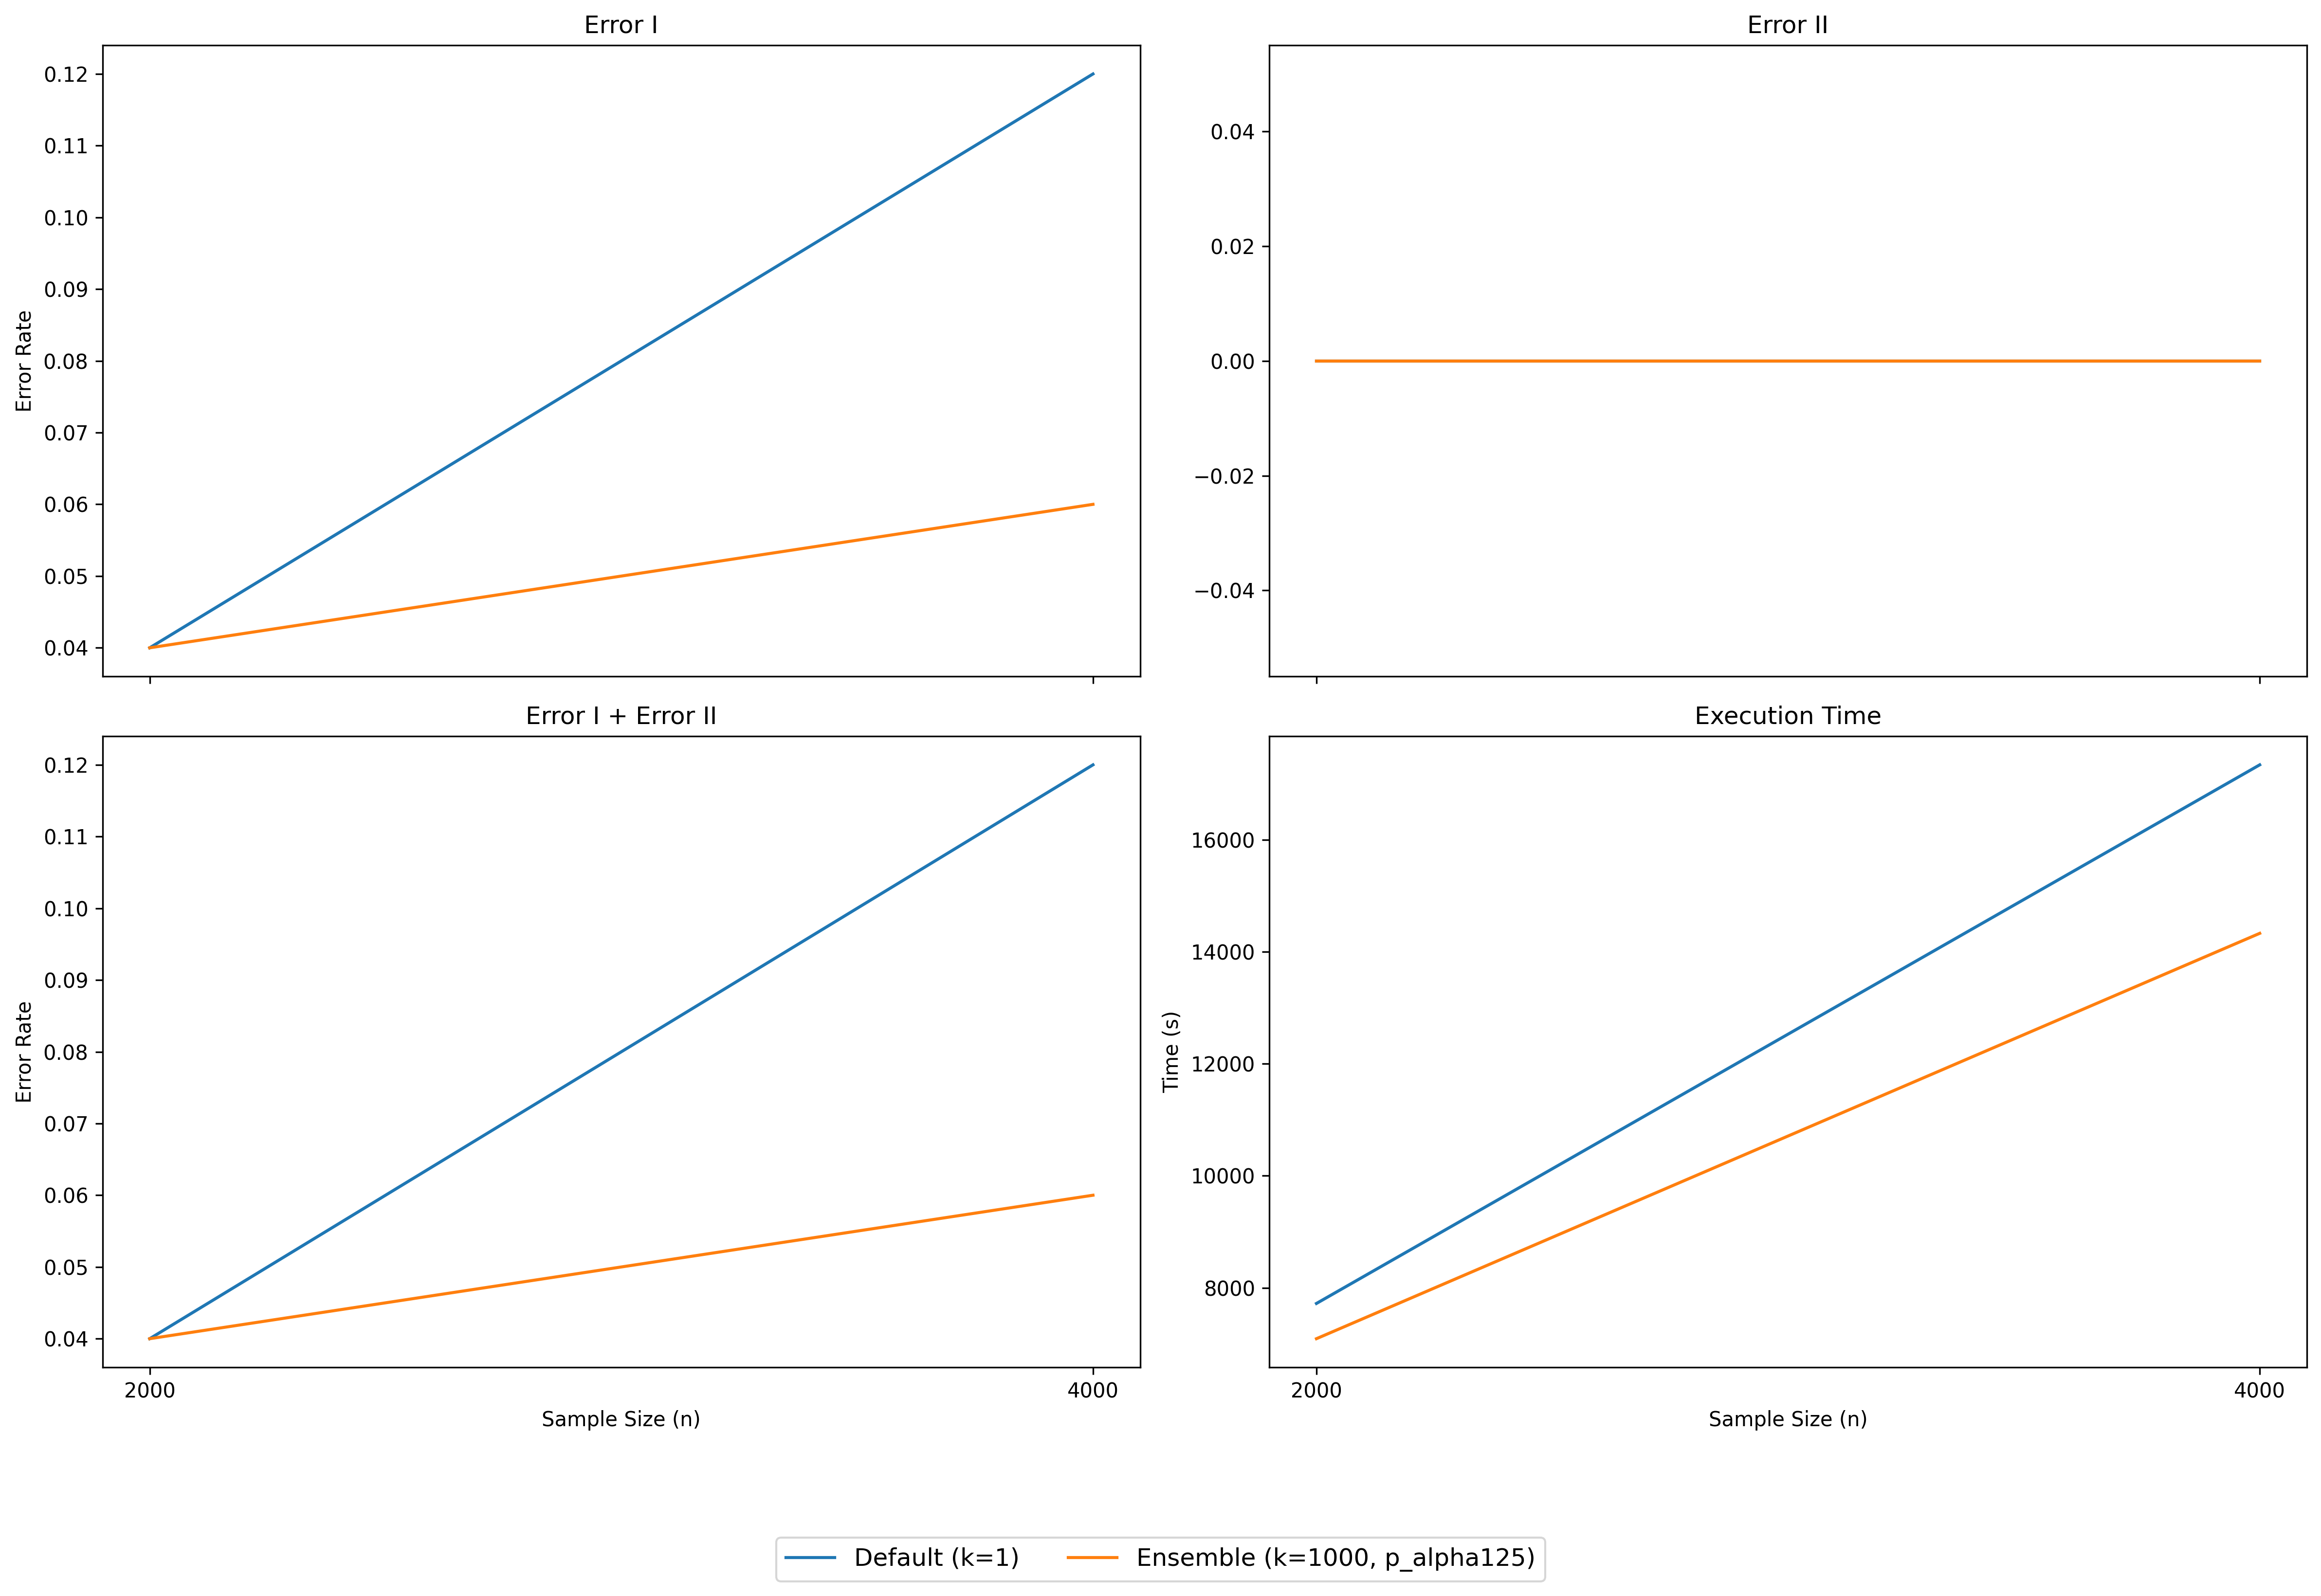

[[[0.04, 0.12], [0.0, 0.0], [7720.640399217606, 17336.655929088593]],
 [[0.04, 0.06], [0.0, 0.0], [7091.515817642212, 14328.567513465881]]]

In [2]:
n_list = [2000, 4000]
ensembles = [(p_alpha125, 1), (p_alpha125, 1000)]
t = 50
cit = cmiknn
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=2,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results